Rechneranwendungen in der Physik - Übung N.1 Schräger Wurf

Santiago.R Diego Rubio Carrera

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
import random as rd

Zuerst definieren wir unsere Funktionen $y_1(x)$ und $y_2(x,\theta _0)$ für den schrägen Wurf. Diese entnehmen wir aus dem lösen der trivialen Differentialgleichung $m\vec{a}(t)=-gt\vec{e_y}$ nach der Funktion des Weges $\vec{s}(t)$ durch doppeltes integrieren $\iint \vec{a}(t) dt^2$ und wählen für $\vec{v_0}$ als Integrationskonstante die $\vec{e_x}$ und $\vec{e_y}$ Komponenten $\vec{v}_x=v_0*cos(\theta _0)*\vec{e_x}$ und $\vec{v}_y=v_0*sin(\theta _0)*\vec{e_y}$ sowie $\vec{x}_0=H_0*\vec{e_y}$


In [46]:
def y1(x):
    H=4.54 #in m
    Theta=np.radians(20)  #in radians with example value of 20 Degrees
    rd.seed(363)
    vr=rd.random()  #with values between 0.1 and 1
    v0=10+10*vr  #in m/s
    return np.tan(Theta)*x-(9.81/(2*((np.cos(Theta))**2)*(v0**2)))*(x**2)+H


In [42]:
def y2(x,Theta):
    H=4.54 #in m
    rd.seed(363)
    vr=rd.random() #with values between 0.1 and 1
    v0=10+10*vr #in m/s
    return np.tan(Theta)*x-(9.81/(2*((np.cos(Theta))**2)*(v0**2)))*(x**2)+H

Die hierbei entstehende Funktion $\vec{s}(t)=-\frac{g}{2}t^2\vec{e_y}+sin(\theta _0)v_0t\vec{e_y}+H_0\vec{e_y}+cos(\theta _0)v_0t\vec{e_x}$ kann jeweils in die Einzelkomponenten $x(t)=\frac{d}{d\vec{e_x}}\vec{s}(t)= \cos(\theta _0)v_0t$ und $y(t)=\frac{d}{d\vec{e_y}}\vec{s}(t)=-\frac{g}{2}t^2+sin(\theta _0)v_0t+H_0 $ aufgeteilt werden. Durch umformen von $x(t)$ auf $t(x)=\frac{x}{cos(\theta _0)v_0}$ und einsetzen in $y(t)=y(t(x))$ erhalten wir die oben definierten Funktionen $y_1(x)$ und $y_2(x,\theta _0)$ als $y(x)=-\frac{g}{2cos(\theta _0)^2v_0^2}x^2+tan(\theta _0)x+H_0$

In [15]:
print(y1)

<function y1 at 0x7f9315e8dd40>


In [16]:
print(y1(2))

5.203564413174984


In [17]:
print(y2(2,np.radians(20)))

5.19784600354001


In [18]:
x = np.linspace(0,50, num=5000)
print(y1(x))

[  4.54         4.54363876   4.5472742  ... -18.8616441  -18.87465247
 -18.88766417]


a) Darstellen der Funktion $y_1(x)$ mit den Startparametern $H_0=4.54m$, $v_0=(10+10*rand[0;1])m/s$ und $\theta _0=20°$

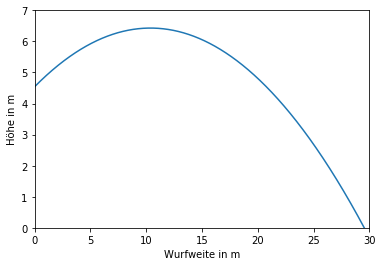

Der Stein fällt auf dem Boden nach 29.54 metern


In [105]:
y1(x)
plt.xlabel('Wurfweite in m')
plt.ylabel('Höhe in m')
plt.plot(x,y1(x))
startx, endx = 0, 30
starty, endy = 0, 7
plt.axis([startx, endx, starty, endy])
plt.show()
r1 = opt.brentq(lambda x: y1(x), 0, 50)
print('Der Stein fällt auf dem Boden nach',round(r1,2),'metern')

b) Darstellen der Funktionsschar $y_2(x,\theta _0)$ mit den Startparametern $H_0=4.54m$ und $v_0=(10+10*rand[0;1])m/s$

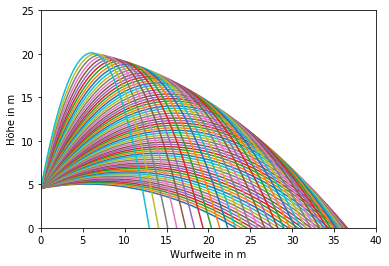

In [54]:
x = np.linspace(0,50, num=5000)

for i in range(10,80,1):
    plt.plot(x,y2(x,np.radians(i)))
plt.xlabel('Wurfweite in m')
plt.ylabel('Höhe in m')    
startx, endx = 0, 40
starty, endy = 0, 25
plt.axis([startx, endx, starty, endy])
plt.show()

c) Ausrechnen der maximalen Wurfweite $x_{max}$ und den dazugehörigen Abwurfswinkel $\theta _{max}$ aus der Funktionsschar $y_2(x,\theta _0)$

In [110]:
x = np.linspace(0,50, num=5000)
mylist = []
for i in range(10,80,1):
    r2 = opt.brentq(lambda x: y2(x,np.radians(i)), 0, 50)
    mylist.append(r2)
    
m=max(mylist)
k=10+mylist.index(m)
print('Die maximale Wurfweite beträgt',round(m,2),'Meter mit einem Abwurfswinkel von', k,'Grad')

Die maximale Wurfweite beträgt 36.57 Meter mit einem Abwurfswinkel von 41 Grad
